### 목표 : 총평점 & 총평 text generator

In [1]:
from pymongo import MongoClient
import json
import pandas as pd
import numpy as np

with open("../letter-preprocess/secrets.json", 'r') as f:
    info = json.load(f)

mongo_host = "mongodb://{}:{}@{}:{}".format(info['mongo_info']['user'],
                                                    info['mongo_info']['password'],
                                                    info['host'],
                                                    info['mongo_info']['port'])

mongo = MongoClient(mongo_host)

In [2]:
db = mongo['rating_db']
posts = db.posts

In [3]:
posts.count_documents({})

4050

In [4]:
posts.find_one()

{'_id': ObjectId('608d29d23469c2524d528203'),
 'target': 3.0,
 'content': '\n1. 객체지향프로그래밍\nA+,프로그래밍 수업을 들으면서 프로그램을 만들고 수정하는 과정이 어릴 때부터 좋아하던 수학문제를 푸는 과정과 비슷하다는 것을 깨달으면서 WEP/APP개발에 관심을 갖게 되었습니다. \n\n2.데이터베이스 설계\nA0,데이터베이스를 설계하고 빅 데이터를 분석하는데 필요한 언어와 프로그램의 사용법을 익혔습니다. \n\n3. 컴퓨터그래픽스 설계\nA0, 컴퓨터 그래픽스 설계 과목을 수강하며 OpenGL을 이용하여 3D 공간을 만들고 객체를 생성하여 컴퓨터 그래픽을 사용하는 방법을 익혔습니다. \n\n한국oo협회가 운영하는 빅 데이터 관리자과정을 수강하여 Java, 오라클, 하둡, R 등 데이터베이스를 설계하고 빅 데이터를 분석하는데 필요한 언어와 프로그램의 사용법을 익혔습니다. \n\n또한 단순히 수업을 듣는 데에 만족하지 않고 프로그램 하나를 배울 때마다 미니프로젝트를 진행하여 실제 사용에 필요한 경험을 얻을 수 있었고, 특허와 관련된 데이터베이스와 그 안에서 원하는 정보를 검색하는 시스템 설계하는 졸업 프로젝트를 진행 중에 있습니다. \n\nNHN엔터테이먼트는 생활, 문화 기반의 IT서비스를 제공하는 기업이기 때문에 많은 사용자가 편리하게 이용할 수 있는 프로그램을 개발하는 것이 가장 중요하다고 생각합니다. 저는 입사 후 단순히 성과를 내기위한 개발이 아닌 고객이 필요로 하는 프로그램을 개발하려고 사용자가 만족하는 성능을 내도록 노력하겠습니다. \n'}

In [5]:
data = []

for post in posts.find():
    data.append([post['content'], post['target']])
    
df = pd.DataFrame(data, columns=['content', 'target'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4050 entries, 0 to 4049
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   content  4050 non-null   object 
 1   target   4050 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.4+ KB


In [6]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df['content'], df['target'], test_size=0.2, random_state=121)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(list(train_x))

In [7]:
len(train_x), len(test_x)

(3240, 810)

In [8]:
print("index_word :" , len(tokenizer.index_word ))  # index - word dict
print("word_index :" , len(tokenizer.word_index ))  # word - index dict
print("단어 출현 빈도수 : " , len(tokenizer.index_docs ))
print("문장 수 : " , tokenizer.document_count)

index_word : 55283
word_index : 55283
단어 출현 빈도수 :  55283
문장 수 :  3240


In [ ]:
print("0번째 자소서의 단어 길이", len(token_train_x[0]))

In [9]:
# 원-핫 이진 벡터 표현
one_hot_train_x = tokenizer.texts_to_matrix(train_x, mode='binary')#TODO
one_hot_test_x = tokenizer.texts_to_matrix(test_x, mode='binary')
print( "one_hot_train_x: ", one_hot_train_x  )

one_hot_train_x:  [[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_y = to_categorical(train_y)
one_hot_test_y = to_categorical(test_y)

In [ ]:
one_hot_train_y[:1], train_y[:1]

In [10]:
label_dict = {1.0 : 0, 1.5 : 1, 2.0 : 2, 2.5 : 3, 
              3.0 : 4, 3.5 : 5, 4.0 : 6, 4.5 : 7, 5.0 : 8}

def to_one_hot(labels, dimension=9):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        l = label_dict[label]
        results[i, l] = 1.
    return results

one_hot_label = to_one_hot(train_y)
one_hot_test = to_one_hot(test_y)

In [11]:
one_hot_label[:1], train_y[:1]

(array([[0., 0., 1., 0., 0., 0., 0., 0., 0.]]),
 3508    2.0
 Name: target, dtype: float64)

In [ ]:
len(temp), len(train_y)

In [ ]:
len(label_dict)

In [ ]:
one_hot_label[0].shape[0]

In [13]:
x_val = one_hot_train_x[:1000]
partial_x_train = one_hot_train_x[1000:]

y_val = one_hot_label[:1000]
partial_y_train = one_hot_label[1000:]

In [12]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(label_dict), activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
5/5 [==============================] - 1s 157ms/step - loss: 1.6368 - accuracy: 0.4044 - val_loss: 0.6728 - val_accuracy: 0.7420
Epoch 2/20
5/5 [==============================] - 0s 26ms/step - loss: 0.4819 - accuracy: 0.8714 - val_loss: 0.2558 - val_accuracy: 0.9690
Epoch 3/20
5/5 [==============================] - 0s 25ms/step - loss: 0.1849 - accuracy: 0.9802 - val_loss: 0.1397 - val_accuracy: 0.9820
Epoch 4/20
5/5 [==============================] - 0s 25ms/step - loss: 0.0745 - accuracy: 0.9976 - val_loss: 0.0877 - val_accuracy: 0.9840
Epoch 5/20
5/5 [==============================] - 0s 25ms/step - loss: 0.0363 - accuracy: 0.9995 - val_loss: 0.0695 - val_accuracy: 0.9850
Epoch 6/20
5/5 [==============================] - 0s 26ms/step - loss: 0.0235 - accuracy: 0.9984 - val_loss: 0.0740 - val_accuracy: 0.9830
Epoch 7/20
5/5 [==============================] - 0s 25ms/step - loss: 0.0148 - accuracy: 0.9992 - val_loss: 0.0564 - val_accuracy: 0.9870
Epoch 8/20
5/5 [==========

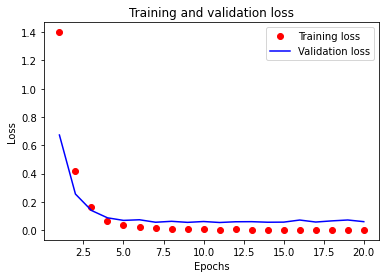

In [15]:
# loss graph
import matplotlib.pyplot as plt

loss = history.history['loss']  # training loss
val_loss = history.history['val_loss']  # validation loss

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

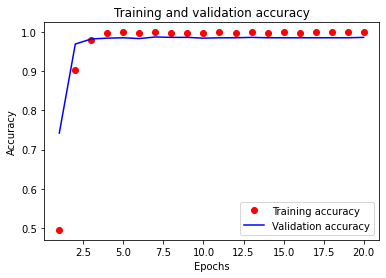

In [16]:
# accuracy graph
plt.clf()  # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
results = model.evaluate(one_hot_test_x, one_hot_test)

print(results)

26/26 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9877
[0.03398588299751282, 0.9876543283462524]


In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(label_dict), activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/4
5/5 [==============================] - 1s 54ms/step - loss: 1.6691 - accuracy: 0.3880 - val_loss: 0.9561 - val_accuracy: 0.5300
Epoch 2/4
5/5 [==============================] - 0s 23ms/step - loss: 0.6461 - accuracy: 0.7803 - val_loss: 0.2945 - val_accuracy: 0.9520
Epoch 3/4
5/5 [==============================] - 0s 23ms/step - loss: 0.2101 - accuracy: 0.9817 - val_loss: 0.1518 - val_accuracy: 0.9840
Epoch 4/4
5/5 [==============================] - 0s 22ms/step - loss: 0.0980 - accuracy: 0.9946 - val_loss: 0.1077 - val_accuracy: 0.9780


In [29]:
results = model.evaluate(one_hot_test_x, one_hot_test)

26/26 [==============================] - 0s 1ms/step - loss: 0.0871 - accuracy: 0.9877


In [30]:
results

[0.08710188418626785, 0.9876543283462524]

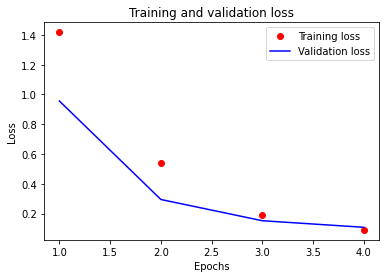

In [22]:
loss = history.history['loss']  # training loss
val_loss = history.history['val_loss']  # validation loss

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

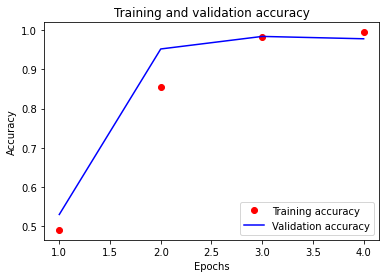

In [23]:
# accuracy graph
plt.clf()  # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [25]:
reverse_label = {value : key for (key, value) in label_dict.items()}

In [31]:
prediction = model.predict(one_hot_test_x)
print(test_y[:5])
print([ np.argmax(x) for x in prediction[:5]])
print( [reverse_label[np.argmax(x)] for x in prediction[:5]] )
print(one_hot_test[:5])

1031    3.0
1781    2.0
1572    3.0
18      3.0
3484    2.0
Name: target, dtype: float64
[4, 2, 4, 2, 2]
[3.0, 2.0, 3.0, 2.0, 2.0]
[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [33]:
prediction = model.predict(one_hot_test_x)

print('prediction:',[ np.argmax(x) for x in prediction[:5] ])
print('predicted rating:', [ reverse_label[np.argmax(x)] for x in prediction[:5] ] )

print('answer:', [ np.argmax(x) for x in one_hot_test[:5] ])
print('answer rating:', [ reverse_label[np.argmax(x)] for x in one_hot_test[:5] ])

prediction: [4, 2, 4, 2, 2]
predicted rating: [3.0, 2.0, 3.0, 2.0, 2.0]
answer: [4, 2, 4, 4, 2]
answer rating: [3.0, 2.0, 3.0, 3.0, 2.0]


In [ ]:
model.save('rating_evaluate_model')

In [ ]:
import pickle

with open('rating_tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:
with open('rating_test_x.pkl', 'wb') as f:
    pickle.dump(vector_test_x, f)

In [ ]:
with open('rating_test_y.pkl', 'wb') as f:
    pickle.dump(one_hot_test_y, f)